<font size="+5">#05. Neural Networks for Classification. Part II</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Flatten

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images = train_images / 255

In [6]:
test_images = test_images / 255

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Get to Know the Data

### Visualize some Samples

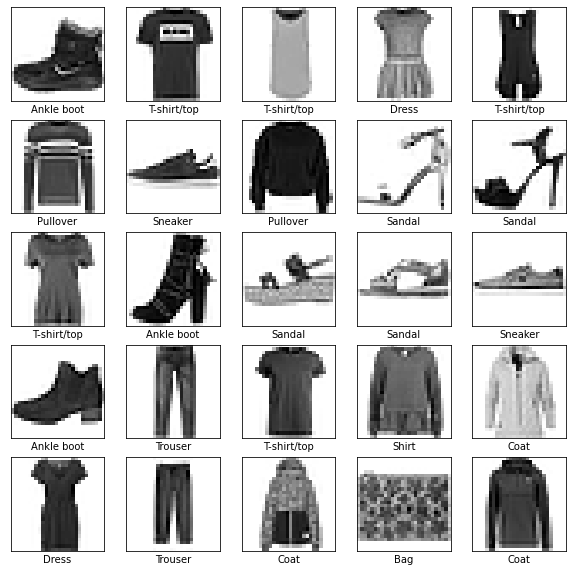

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Visualize One Sample/Row/Image/Explanatory Variables

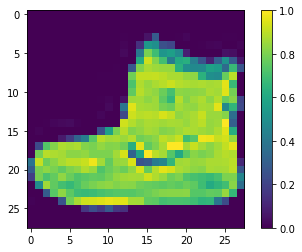

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### Target Variable Value

In [12]:
idx_label = train_labels[0]

In [13]:
class_names[idx_label]

'Ankle boot'

# Neural Network Concepts in Python

## Initializing the `Weights`

> - https://keras.io/api/layers/initializers/

### How to `kernel_initializer` the weights?

In [128]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Flatten

In [129]:
train_images.shape

(60000, 28, 28)

In [130]:
train_images[0].shape

(28, 28)

In [131]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(layer=Dense(units=3, kernel_initializer='zeros'))
model.add(layer=Dense(units=10, activation = 'sigmoid'))

#### Make a Prediction with the Neural Network

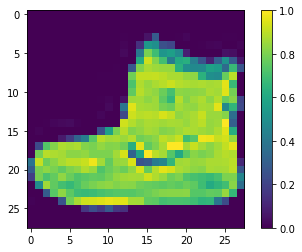

In [132]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [133]:
train_images[0].shape

(28, 28)

#### Observe the numbers for the `weights`

In [134]:
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.47801223,  0.15482515, -0.6600533 , -0.54447794,  0.6231041 ,
         -0.05313784,  0.5489435 ,  0.12822407,  0.38017297,  0.28200305],
        [ 0.5617647 , -0.12826067, -0.31284103,  0.2669763 , -0.18128693,
          0.1762886 , -0.08940905,  0.6746664 , -0.625903  , -0.38940963],
        [ 0.62691355,  0.27357507, -0.5381626 , -0.5028672 ,  0.50651944,
          0.22341448, -0.47232372, -0.15820444,  0.05057836, -0.29410377]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

#### Predictions vs Reality

> 1. Calculate the Predicted Accidents and
> 2. Compare it with the Real Total Accidents

In [135]:
train_images[0].shape

(28, 28)

In [136]:
train_images[:1].shape

(1, 28, 28)

In [137]:
model.predict(x=train_images[:1])

2021-11-19 11:13:25.098383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32)

#### `fit()` the `model` and compare again

In [138]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [139]:
model.fit(train_images, train_labels, epochs=1, verbose=1)

  15/1875 [..............................] - ETA: 14s - loss: 2.1749 - accuracy: 0.1688

2021-11-19 11:13:31.457576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 14s 7ms/step - loss: 1.0209 - accuracy: 0.6639


##### Observe the numbers for the `weights`

In [140]:
model.get_weights()

[array([[ 0.00809487, -0.00322069, -0.0145037 ],
        [-0.03876682, -0.00247221,  0.0206114 ],
        [-0.0708717 ,  0.11486357,  0.1056717 ],
        ...,
        [-0.07979509, -0.16252016, -0.14197288],
        [-0.00154128, -0.08735144, -0.04532965],
        [-0.00645243, -0.10889355, -0.04082305]], dtype=float32),
 array([-0.16127159,  0.33506572,  0.00157257], dtype=float32),
 array([[-0.49623844, -0.21008356, -0.3782415 , -0.88285905,  0.28096   ,
          0.5552215 , -0.06537601,  0.22842257,  1.0018141 ,  0.29853398],
        [ 0.9127228 ,  0.02381018, -0.4740328 ,  0.20355913, -0.5611308 ,
          0.35081956, -0.3601284 ,  1.0557632 , -0.3934291 ,  0.17876652],
        [ 0.63444656,  0.9218531 , -0.53842664, -0.6567623 ,  0.53292036,
         -0.20248747,  0.09496216, -0.18247078,  0.15964374, -0.8336824 ]],
       dtype=float32),
 array([ 0.20655522, -0.6835529 , -0.2805827 ,  0.1863656 , -0.28955883,
         0.8265016 ,  0.71891963, -0.47891563, -0.3548085 , -0.80545

##### Predictions vs Reality

In [141]:
y_pred = model.predict(train_images)

2021-11-19 11:14:13.784360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [142]:
(y_pred.argmax(axis=1) == train_labels).mean()

0.7399

### How to `kernel_initializer` the weights to 1?

In [143]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(layer=Dense(units=128, kernel_initializer='ones'))
model.add(layer=Dense(units=10, activation='sigmoid'))

#### Make a Prediction with the Neural Network

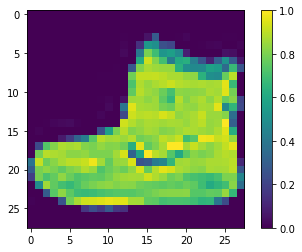

In [144]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [145]:
train_images[0].shape

(28, 28)

#### Observe the numbers for the `weights`

In [146]:
model.get_weights()

[array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.06856893,  0.02655135, -0.1280719 , ...,  0.03060873,
         -0.03452572,  0.15476693],
        [ 0.12319903,  0.11846499,  0.177

#### Predictions vs Reality

> 1. Calculate the Predicted Accidents and
> 2. Compare it with the Real Total Accidents

In [147]:
train_images[0].shape

(28, 28)

In [148]:
train_images[:1].shape

(1, 28, 28)

In [149]:
model.predict(x=train_images[:1])

2021-11-19 11:14:27.187895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.000000e+00, 1.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 2.011233e-37, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00]], dtype=float32)

#### `fit()` the `model` and compare again

In [150]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [151]:
model.fit(train_images, train_labels, epochs=1, verbose=1)

  25/1875 [..............................] - ETA: 7s - loss: 125.4041 - accuracy: 0.1037

2021-11-19 11:14:28.146643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 14.9231 - accuracy: 0.5072


##### Observe the numbers for the `weights`

In [152]:
model.get_weights()

[array([[1.0035136 , 1.0148026 , 0.98352253, ..., 1.0034866 , 0.9951002 ,
         0.991788  ],
        [0.95141345, 1.0173999 , 1.0216669 , ..., 0.9777838 , 1.0017431 ,
         1.0168309 ],
        [0.9021283 , 1.1213624 , 1.1250027 , ..., 0.9796101 , 0.9995128 ,
         0.9364058 ],
        ...,
        [1.0208236 , 1.0238342 , 1.0140275 , ..., 0.9476779 , 1.0775435 ,
         0.944257  ],
        [1.0252203 , 0.983255  , 0.9763179 , ..., 1.0232421 , 1.0245475 ,
         0.9714731 ],
        [0.9909509 , 0.99763024, 0.97790897, ..., 0.99386877, 1.033696  ,
         0.9579142 ]], dtype=float32),
 array([ 6.32274523e-02, -2.05332041e-01,  1.44283369e-01,  9.31810439e-02,
        -4.15074646e-01,  1.27296060e-01, -2.39482075e-01, -2.80869845e-02,
        -2.61768520e-01, -8.93612429e-02, -2.21289054e-01, -1.25067368e-01,
        -3.49569887e-01,  1.71582565e-01, -1.43369064e-01,  1.19272135e-01,
        -6.67906776e-02, -1.81840032e-01,  6.75478056e-02, -2.91174680e-01,
        -1.982

##### Predictions vs Reality

In [153]:
y_pred = model.predict(train_images)

2021-11-19 11:14:38.140107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [154]:
(y_pred.argmax(axis=1) == train_labels).mean()

0.1

### How to `kernel_initializer` the weights to `glorot_uniform` (default)?

In [155]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(layer=Dense(units=128, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=10, activation='sigmoid'))

#### Make a Prediction with the Neural Network

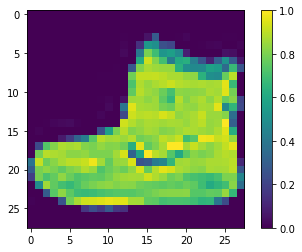

In [156]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [157]:
train_images[0].shape

(28, 28)

#### Observe the numbers for the `weights`

In [158]:
model.get_weights()

[array([[-0.0565572 ,  0.06732685, -0.06275694, ...,  0.02292342,
         -0.05706771,  0.07246331],
        [ 0.01318163,  0.01880031,  0.03172336, ...,  0.04387539,
          0.04471848,  0.07845394],
        [ 0.05682159, -0.03220249,  0.04018642, ..., -0.00618116,
         -0.03408571, -0.0564589 ],
        ...,
        [-0.06096654, -0.01269948,  0.07087927, ...,  0.06054171,
         -0.06711847,  0.01814737],
        [ 0.03381671, -0.07884867,  0.05507851, ..., -0.03226563,
          0.00467993, -0.02237426],
        [ 0.01644419, -0.04440789,  0.02630556, ..., -0.07310038,
         -0.0270233 ,  0.01040745]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

#### Predictions vs Reality

> 1. Calculate the Predicted Accidents and
> 2. Compare it with the Real Total Accidents

In [159]:
train_images[0].shape

(28, 28)

In [160]:
train_images[:1].shape

(1, 28, 28)

In [161]:
model.predict(x=train_images[:1])

2021-11-19 11:15:13.336408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.9277021 , 0.5429206 , 0.23627247, 0.7458364 , 0.3717492 ,
        0.3357023 , 0.31755078, 0.26904085, 0.2869044 , 0.33892506]],
      dtype=float32)

#### `fit()` the `model` and compare again

In [162]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [163]:
model.fit(train_images, train_labels, epochs=1, verbose=1)

  38/1875 [..............................] - ETA: 7s - loss: 1.3409 - accuracy: 0.5502

2021-11-19 11:15:16.274766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5788 - accuracy: 0.8007


##### Observe the numbers for the `weights`

In [164]:
model.get_weights()

[array([[-5.7509247e-02,  7.8096099e-02, -5.4658961e-02, ...,
          1.8186623e-02, -7.3860683e-02,  7.3189870e-02],
        [ 2.4416097e-02,  1.5359908e-02,  3.3641845e-02, ...,
          3.9191198e-02,  6.0789060e-02,  5.3716838e-02],
        [ 4.1567471e-02, -7.4252173e-02,  9.9394307e-02, ...,
          5.4496333e-02,  1.6905552e-02, -1.0785662e-01],
        ...,
        [-9.2308238e-02, -9.7844504e-02,  1.1346644e-01, ...,
          1.0173528e-01, -8.7908350e-02,  1.2161586e-01],
        [-2.1141853e-02, -1.3585638e-01,  7.0947140e-02, ...,
         -2.0342631e-02, -3.2763433e-05,  8.3275363e-02],
        [-1.4521339e-02, -5.2999496e-02,  3.5696279e-02, ...,
         -5.8601797e-02, -1.8627832e-02,  6.0020361e-02]], dtype=float32),
 array([ 0.1939819 , -0.05472345,  0.2796186 ,  0.23027578,  0.13320677,
         0.265601  , -0.09199249, -0.1728066 , -0.04914607,  0.04515486,
        -0.02825801,  0.2719264 ,  0.06127898, -0.06946246, -0.22389933,
        -0.11016142, -0.0009342

##### Predictions vs Reality

In [165]:
y_pred = model.predict(train_images)

2021-11-19 11:15:29.897024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [166]:
(y_pred.argmax(axis=1) == train_labels).mean()

0.82615

## Play with the Activation Function

> - https://keras.io/api/layers/activations/

In [41]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w?start=558" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Use `sigmoid` activation in last layer

In [174]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=10, activation='sigmoid'))

In [175]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### `fit()` the Model

In [176]:
model.fit(train_images, train_labels, epochs=1, verbose=1)

  39/1875 [..............................] - ETA: 7s - loss: 1.3862 - accuracy: 0.5393

2021-11-19 11:18:37.843595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5759 - accuracy: 0.8019


#### Predictions vs Reality

In [177]:
y_pred = model.predict(train_images)

2021-11-19 11:18:53.028701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [178]:
(y_pred.argmax(axis=1) == train_labels).mean()

0.79625

#### Observe the numbers for the `weights`

> - Have they changed?

In [179]:
model.get_weights()

[array([[ 0.021401  ,  0.0151707 ,  0.00786851, ...,  0.03103299,
          0.04914114,  0.03708985],
        [ 0.06277743,  0.00115855,  0.0451003 , ..., -0.03863322,
         -0.06890506, -0.07705671],
        [-0.06610506,  0.11267123, -0.00856603, ...,  0.02222804,
         -0.03412509, -0.01892962],
        ...,
        [ 0.10981677,  0.06952737, -0.05492503, ...,  0.01259694,
         -0.12804407,  0.06180033],
        [ 0.00907423, -0.00836205,  0.02572381, ...,  0.06201978,
         -0.03771817, -0.008307  ],
        [-0.05082601, -0.05200988, -0.07788346, ..., -0.05800046,
          0.03831339,  0.0316083 ]], dtype=float32),
 array([ 0.06242212,  0.0937486 , -0.12002691,  0.07515426,  0.17824689,
         0.01500142,  0.28354055, -0.11022371, -0.28213245,  0.04729814,
        -0.02513187,  0.2442172 , -0.06539025, -0.07640171, -0.2089643 ,
        -0.05527541,  0.11536337,  0.05088038,  0.08253686,  0.20010087,
        -0.05735913,  0.1912156 , -0.19239852, -0.18212056,  0.114

### Use `tanh` activation in last layer

In [183]:
from keras.layers import Softmax

In [188]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=10, activation='linear'))
model.add(layer=Softmax())

In [189]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### `fit()` the Model

In [190]:
model.fit(train_images, train_labels, epochs=1, verbose=1)

  39/1875 [..............................] - ETA: 7s - loss: 1.3667 - accuracy: 0.5593

2021-11-19 11:22:07.246973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.5762 - accuracy: 0.8007


#### Predictions vs Reality

In [191]:
y_pred = model.predict(train_images)

2021-11-19 11:23:27.036827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [192]:
(y_pred.argmax(axis=1) == train_labels).mean()

0.8372833333333334

#### Observe the numbers for the `weights`

> - Have they changed?

In [193]:
model.get_weights()

[array([[ 0.05103458, -0.04863162, -0.0462721 , ...,  0.04902798,
          0.09055348,  0.00577587],
        [ 0.00657125,  0.07334263, -0.05832075, ..., -0.0472456 ,
         -0.07830787, -0.01117894],
        [-0.03955436,  0.00618579, -0.07556824, ...,  0.08018979,
         -0.08617014,  0.01049943],
        ...,
        [ 0.11210521, -0.14371338, -0.0339789 , ...,  0.09269878,
          0.08454808, -0.11779662],
        [ 0.04655862,  0.03403811, -0.0994332 , ..., -0.00135748,
         -0.00735713, -0.00829858],
        [ 0.01041059, -0.06223447, -0.07782137, ..., -0.06255224,
         -0.03339522,  0.00149296]], dtype=float32),
 array([ 0.01069131, -0.0757488 ,  0.02987708,  0.12624261, -0.19576193,
        -0.07713183, -0.02697477,  0.04991023, -0.09294163,  0.09440246,
         0.05835541,  0.32781553, -0.2065822 ,  0.29784688, -0.20396982,
        -0.18404545,  0.05680119, -0.08976239,  0.22448172,  0.10918161,
        -0.01300645,  0.04571343,  0.2204984 ,  0.14722487, -0.080

### Use `relu` activation in last layer

In [194]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=10, activation='relu'))

In [195]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### `fit()` the Model

In [196]:
model.fit(train_images, train_labels, epochs=1, verbose=1)

  24/1875 [..............................] - ETA: 8s - loss: 9.1708 - accuracy: 0.1120 

2021-11-19 11:23:55.774114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 3.3790 - accuracy: 0.1293


#### Predictions vs Reality

In [197]:
y_pred = model.predict(train_images)

2021-11-19 11:24:05.735174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [198]:
(y_pred.argmax(axis=1) == train_labels).mean()

0.12661666666666666

#### Observe the numbers for the `weights`

> - Have they changed?

In [199]:
model.get_weights()

[array([[-7.5986214e-02,  6.4039730e-02,  1.1567570e-02, ...,
         -2.7636733e-02, -6.7038715e-02,  3.9652757e-02],
        [-3.4930851e-02, -6.4389966e-02,  2.8161291e-02, ...,
          4.7556188e-02,  4.3167066e-02, -9.1851689e-06],
        [ 1.3422216e-02, -3.7376564e-02,  9.3911117e-04, ...,
          2.3669809e-02,  3.2344431e-02, -3.8798098e-02],
        ...,
        [ 4.3072134e-02, -4.3587744e-02, -7.4837662e-02, ...,
          2.8310044e-02,  3.8295802e-02,  1.3239647e-03],
        [ 9.2183851e-02, -5.0559387e-02,  4.1704129e-02, ...,
         -2.2826321e-02, -5.1521219e-02, -2.6066480e-02],
        [-7.3517933e-02,  4.2805050e-02,  5.1927801e-02, ...,
          4.5622177e-03, -6.6458881e-02,  2.5967784e-02]], dtype=float32),
 array([ 1.8559540e-02,  2.4384061e-02,  6.7211539e-03,  2.8410709e-02,
         2.6493063e-02,  3.2269210e-02, -2.6291883e-02, -3.7711706e-02,
         2.5096260e-02,  4.7783341e-02, -2.0011224e-02,  2.1710636e-02,
        -2.1650312e-02,  4.1822895

### How are the predictions changing? Why?

## Optimizer

> - https://keras.io/api/optimizers/#available-optimizers

Optimizers comparison in GIF → https://mlfromscratch.com/optimizers-explained/#adam

Tesla's Neural Network Models is composed of 48 models trainned in 70.000 hours of GPU → https://tesla.com/ai

1 Year with a 8 GPU Computer → https://twitter.com/thirdrowtesla/status/1252723358342377472

### Use Gradient Descent `SGD`

In [214]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=10, activation='sigmoid'))

#### `compile()` the model

In [215]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### `fit()` the Model

In [216]:
history = model.fit(train_images, train_labels, epochs=20, verbose=1, validation_split=0.3)

Epoch 1/20
  44/1313 [>.............................] - ETA: 4s - loss: 1.7200 - accuracy: 0.4233

2021-11-19 11:30:06.261253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1308/1313 [============================>.] - ETA: 0s - loss: 0.7426 - accuracy: 0.7534

2021-11-19 11:30:10.876845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - 6s 4ms/step - loss: 0.7420 - accuracy: 0.7536 - val_loss: 0.5734 - val_accuracy: 0.8052
Epoch 2/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.5354 - accuracy: 0.8196 - val_loss: 0.5092 - val_accuracy: 0.8239
Epoch 3/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4928 - accuracy: 0.8319 - val_loss: 0.4827 - val_accuracy: 0.8346
Epoch 4/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4702 - accuracy: 0.8385 - val_loss: 0.4679 - val_accuracy: 0.8391
Epoch 5/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4559 - accuracy: 0.8427 - val_loss: 0.4591 - val_accuracy: 0.8393
Epoch 6/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4467 - accuracy: 0.8462 - val_loss: 0.4546 - val_accuracy: 0.8436
Epoch 7/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4387 - accuracy: 0.8486 - val_loss: 0.4577 - val_accuracy: 0.8426
Epo

#### Predictions vs Reality

In [217]:
y_pred = model.predict(train_images)

2021-11-19 11:32:25.239482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [218]:
(y_pred.argmax(axis=1) == train_labels).mean()

0.8601166666666666

#### Observe the numbers for the `weights`

> - Have they changed?

In [219]:
model.get_weights()

[array([[-0.01616501, -0.03223876,  0.01931621, ...,  0.04224468,
          0.06351702,  0.02823112],
        [-0.00080898, -0.07819748, -0.03285284, ...,  0.0494666 ,
         -0.05982565, -0.05574252],
        [-0.03417755,  0.00888074,  0.00306008, ...,  0.02150556,
         -0.04193307,  0.04391378],
        ...,
        [-0.04684341, -0.06215554,  0.07970051, ...,  0.0184761 ,
         -0.00674453, -0.00272611],
        [ 0.04386987, -0.07098866, -0.05682206, ...,  0.01060417,
         -0.01601897,  0.0311856 ],
        [ 0.06084208,  0.07041522,  0.0653111 , ...,  0.01853481,
         -0.055863  ,  0.06979731]], dtype=float32),
 array([-0.03851678,  0.05352984,  0.00552701,  0.05109194, -0.14748159,
         0.09550598,  0.05677063,  0.17522028, -0.0917066 , -0.0632806 ,
         0.07905112, -0.14055653, -0.07972129,  0.12613255,  0.0012189 ,
         0.02054438,  0.19036964,  0.14384823, -0.07046549,  0.09873875,
         0.09694163, -0.04371353,  0.05440426,  0.29927847,  0.392


#### View History

In [220]:
import matplotlib.pyplot as plt

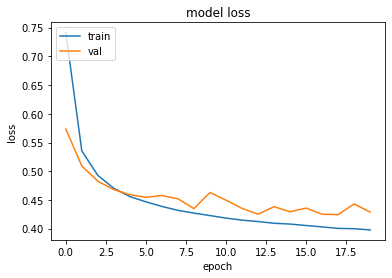

In [221]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

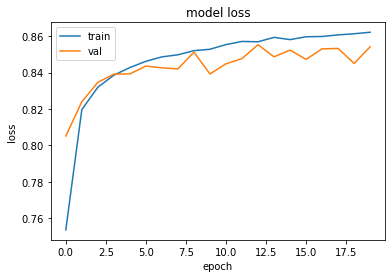

In [222]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Use `ADAM`

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=10, activation='sigmoid'))

Metal device set to: Apple M1


2021-11-19 11:35:13.177282: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-19 11:35:13.177492: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### `compile()` the model

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### `fit()` the Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=20, verbose=1, validation_split=0.3)

#### Predictions vs Reality

In [217]:
y_pred = model.predict(train_images)

2021-11-19 11:32:25.239482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [218]:
(y_pred.argmax(axis=1) == train_labels).mean()

0.8601166666666666

#### Observe the numbers for the `weights`

> - Have they changed?

In [219]:
model.get_weights()

[array([[-0.01616501, -0.03223876,  0.01931621, ...,  0.04224468,
          0.06351702,  0.02823112],
        [-0.00080898, -0.07819748, -0.03285284, ...,  0.0494666 ,
         -0.05982565, -0.05574252],
        [-0.03417755,  0.00888074,  0.00306008, ...,  0.02150556,
         -0.04193307,  0.04391378],
        ...,
        [-0.04684341, -0.06215554,  0.07970051, ...,  0.0184761 ,
         -0.00674453, -0.00272611],
        [ 0.04386987, -0.07098866, -0.05682206, ...,  0.01060417,
         -0.01601897,  0.0311856 ],
        [ 0.06084208,  0.07041522,  0.0653111 , ...,  0.01853481,
         -0.055863  ,  0.06979731]], dtype=float32),
 array([-0.03851678,  0.05352984,  0.00552701,  0.05109194, -0.14748159,
         0.09550598,  0.05677063,  0.17522028, -0.0917066 , -0.0632806 ,
         0.07905112, -0.14055653, -0.07972129,  0.12613255,  0.0012189 ,
         0.02054438,  0.19036964,  0.14384823, -0.07046549,  0.09873875,
         0.09694163, -0.04371353,  0.05440426,  0.29927847,  0.392


#### View History

In [220]:
import matplotlib.pyplot as plt

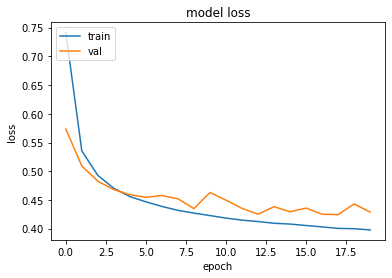

In [221]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

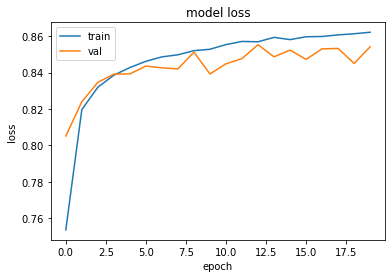

In [222]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Use `Adadelta`

In [11]:
from keras.layers import Dropout

In [21]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='glorot_uniform'))
model.add(layer=Dropout(0.2))
model.add(layer=Dense(units=64, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=10, activation='sigmoid'))

#### `compile()` the model

In [22]:
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### `fit()` the Model

In [23]:
history = model.fit(train_images, train_labels, epochs=20, verbose=1, validation_split=0.3)

Epoch 1/20
  36/1313 [..............................] - ETA: 5s - loss: 2.6082 - accuracy: 0.0608

2021-11-19 11:45:37.410763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1309/1313 [============================>.] - ETA: 0s - loss: 2.2836 - accuracy: 0.1595

2021-11-19 11:45:43.012097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - 7s 5ms/step - loss: 2.2831 - accuracy: 0.1596 - val_loss: 1.9426 - val_accuracy: 0.2996
Epoch 2/20
1313/1313 [==============================] - 7s 5ms/step - loss: 1.8445 - accuracy: 0.3380 - val_loss: 1.6063 - val_accuracy: 0.4928
Epoch 3/20
1313/1313 [==============================] - 7s 5ms/step - loss: 1.5601 - accuracy: 0.4775 - val_loss: 1.3792 - val_accuracy: 0.6026
Epoch 4/20
1313/1313 [==============================] - 7s 5ms/step - loss: 1.3652 - accuracy: 0.5566 - val_loss: 1.2253 - val_accuracy: 0.6385
Epoch 5/20
1313/1313 [==============================] - 6s 5ms/step - loss: 1.2331 - accuracy: 0.5983 - val_loss: 1.1197 - val_accuracy: 0.6566
Epoch 6/20
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1343 - accuracy: 0.6258 - val_loss: 1.0437 - val_accuracy: 0.6696
Epoch 7/20
1313/1313 [==============================] - 6s 5ms/step - loss: 1.0674 - accuracy: 0.6420 - val_loss: 0.9876 - val_accuracy: 0.6803
Epo

#### Predictions vs Reality

In [217]:
y_pred = model.predict(train_images)

2021-11-19 11:32:25.239482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [218]:
(y_pred.argmax(axis=1) == train_labels).mean()

0.8601166666666666

#### Observe the numbers for the `weights`

> - Have they changed?

In [14]:
model.get_weights()

[array([[ 0.02733623,  0.05482984, -0.00344628, ...,  0.00711676,
          0.00530308,  0.07475363],
        [-0.05073345,  0.02034894,  0.04733811, ..., -0.01811063,
          0.02559805, -0.02142332],
        [ 0.01734355, -0.00594246,  0.02315   , ..., -0.07542071,
         -0.00692452, -0.05847235],
        ...,
        [ 0.06073072,  0.07353506,  0.04253372, ..., -0.07664194,
          0.03960584,  0.0552127 ],
        [-0.05877764, -0.06436759, -0.04289148, ..., -0.00982498,
         -0.04370419,  0.02752567],
        [ 0.00089324,  0.05457652,  0.03389387, ..., -0.07277791,
          0.02440441,  0.06028203]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.


#### View History

In [15]:
import matplotlib.pyplot as plt

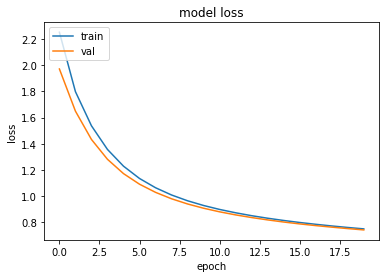

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

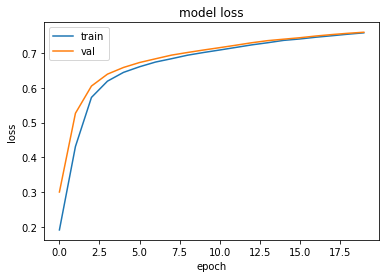

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Does it take different times to get the best accuracy? Why?

## Loss Functions

> - https://keras.io/api/losses/

### `binary_crossentropy`

### `sparse_categorical_crossentropy`

### `mean_absolute_error`

### `mean_squared_error`

## In the end, what should be a feasible configuration of the Neural Network for this data?

# Common Errors

## The `kernel_initializer` Matters

## The `activation` Function Matters

## The `optimizer` Matters

## The Number of `epochs` Matters

## The `loss` Function Matters

# Neural Network's importance to find **Non-Linear Patterns** in the Data

> - The number of Neurons & Hidden Layers

https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.87287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

## Summary

- Mathematical Formula
- Weights / Kernel Initializer
- Loss Function
- Activation Function
- Optimizers

## What cannot you change arbitrarily of a Neural Network?

- Input Neurons
- Output Neurons
- Loss Functions